In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Setting Dimensions  for plot

In [2]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
cars_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A_Learning/NEPTL/PythonForDataScience/Week4/Practice/Regression/cars_sampled.csv')
cars_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [6]:
cars_data.shape

(50001, 19)

In [7]:
cars_data.keys()

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [8]:
cars = cars_data.copy(deep = True)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [10]:
print('Data column with null value:\n',cars.isnull().sum())

Data column with null value:
 dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64


In [11]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [18]:
summary_cat= cars.describe(include= "O")
print(summary_cat)


           dateCrawled      name   seller offerType abtest vehicleType  \
count            50001     50001    50001     50001  50001       44813   
unique           12039     38766        2         2      2           8   
top     3/4/2016 16:57  BMW_318i  private     offer   test   limousine   
freq                15        90    49999     49998  25869       13041   

       gearbox  model fuelType       brand notRepairedDamage    dateCreated  \
count    47177  47243    45498       50001             40285          50001   
unique       2    248        7          40                 2             75   
top     manual   golf   petrol  volkswagen                no  3/4/2016 0:00   
freq     36732   3972    30214       10646             35337           1976   

             lastSeen  
count           50001  
unique          10413  
top     6/4/2016 5:46  
freq              107  


#### Setting Float Values 

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [13]:
cars.keys()

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

####  To see max set of columns 

In [15]:
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [19]:
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns= col,axis=1)
cars.keys()

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

In [20]:
cars.drop_duplicates(keep='first', inplace= True)
cars.shape

(49531, 14)

In [21]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

## **Variable Years of Regression**

In [24]:
Yearwise_counts = cars['yearOfRegistration'].value_counts().sort_index()
print(Yearwise_counts)

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64


In [25]:
sum(cars['yearOfRegistration'] > 2018)

26

In [26]:
sum(cars['yearOfRegistration'] < 1950)

38

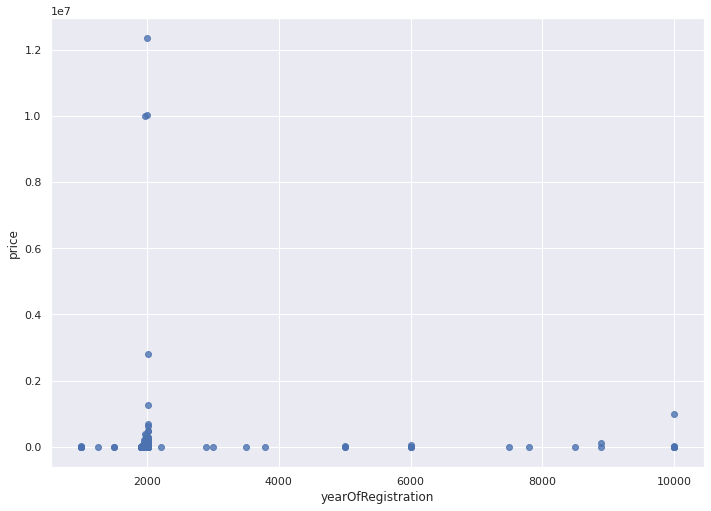

In [27]:
sns.regplot(x= 'yearOfRegistration' , y = 'price', scatter =True, fit_reg = False, data= cars)

In [ ]:
## So we can say working range - 1950 and 2018

In [29]:
## Variable Price
price_counts = cars['price'].value_counts().sort_index()
price_counts.head()

0    1415
1     172
2       1
3       1
5       4
Name: price, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


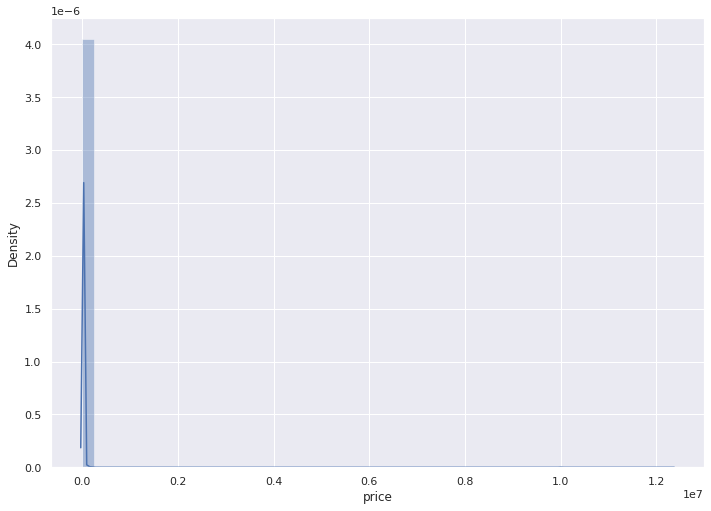

In [31]:
sns.distplot(cars['price'], kde= True)

In [32]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

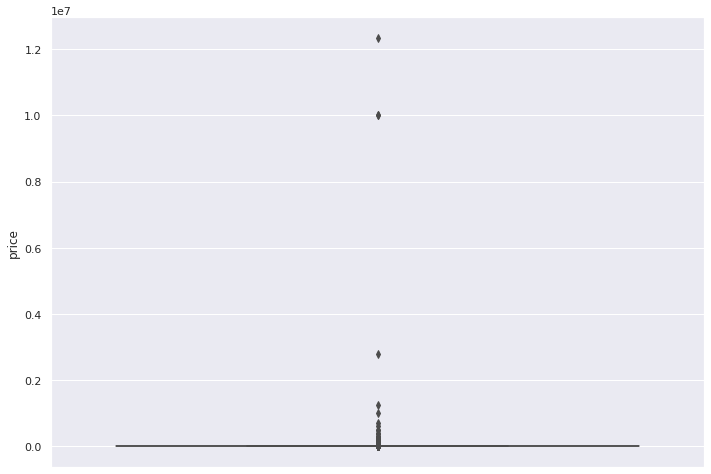

In [33]:
sns.boxplot(y=cars['price'])

In [34]:
sum(cars['price'] > 150000)


34

In [35]:
sum(cars['price'] < 100)

1748

In [ ]:
# So we have taken working range of price is 100 and 15000

In [36]:
cars.keys()

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

In [37]:
power_count = cars['powerPS'].value_counts().sort_index()
power_count.head()

0    5533
1       3
2       2
3       2
4       4
Name: powerPS, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


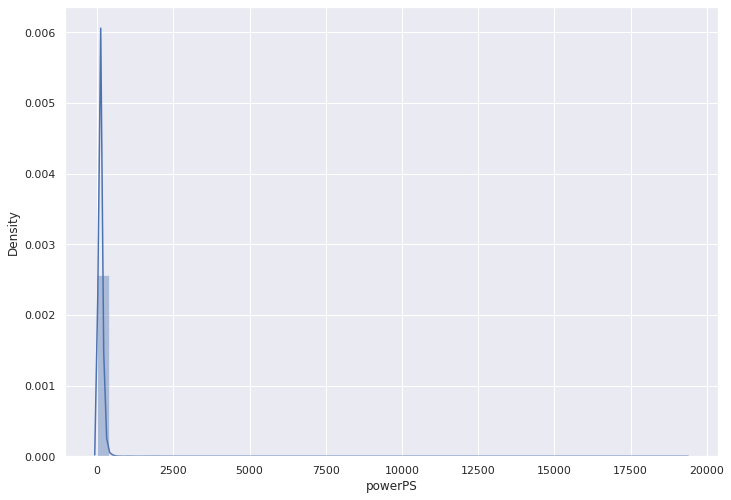

In [39]:
sns.distplot(cars['powerPS'], kde= True)

In [40]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

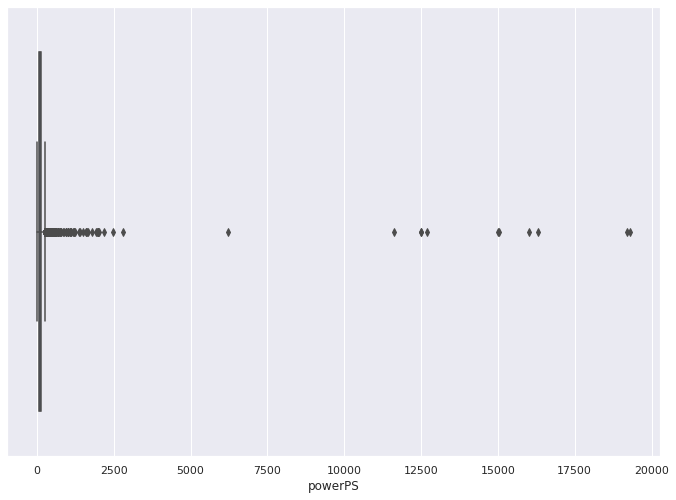

In [42]:
sns.boxplot(x= cars['powerPS'])

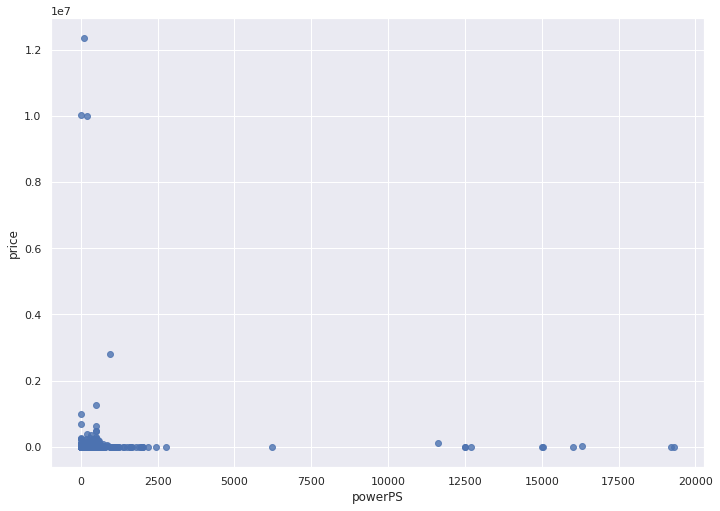

In [43]:
sns.regplot(x='powerPS', y= 'price', scatter= True, fit_reg = False, data= cars)

In [44]:
sum(cars['powerPS']>500) 

115

In [45]:
sum(cars['powerPS'] < 10) 

5565

In [ ]:
# Working range - 10 and 500 for powerPS

In [46]:
print(np.unique(cars['yearOfRegistration']))

[1000 1255 1500 1910 1928 1929 1933 1934 1936 1938 1940 1941 1943 1945
 1947 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2222 2900 3000 3500 3800 5000 6000 7500 7800 8500 8888 9999]


In [47]:
cars = cars[(cars.yearOfRegistration <= 2018) & (cars.yearOfRegistration >= 1950) & (cars.price >= 100) &  (cars.price <= 150000) & (cars.powerPS >=10) & (cars.powerPS <=500)]
cars.head(1000)


,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,private,offer,6000,test,limousine,2009,automatic,177,3er,125000,8,diesel,bmw,no
1194,private,offer,7500,test,cabrio,2006,manual,126,mx_reihe,125000,2,petrol,mazda,no
1195,private,offer,500,control,limousine,1989,manual,102,vectra,150000,4,petrol,opel,no
1196,private,offer,12900,test,station wagon,2008,automatic,232,a6,150000,7,diesel,audi,no


In [48]:
cars.shape

(42772, 14)

In [49]:
print(np.unique(cars['yearOfRegistration']))

[1951 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [50]:
print(np.unique(cars['price']))

[   100    101    110 ... 138000 139000 149000]


In [51]:
cars['monthOfRegistration']/=12

In [52]:
cars.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no


In [ ]:
# Creating new variable age by adding yearOfRegistration and monthOfRegistration

In [53]:
cars['Age'] = (2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age'] = round(cars['Age'],2)
print(cars['Age'])

0       15.250
1       13.500
2       15.920
3       13.000
4       10.920
         ...  
49991   14.670
49992   20.750
49993   19.670
49995   17.250
50000   12.830
Name: Age, Length: 42772, dtype: float64


In [54]:
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [55]:
cars =cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


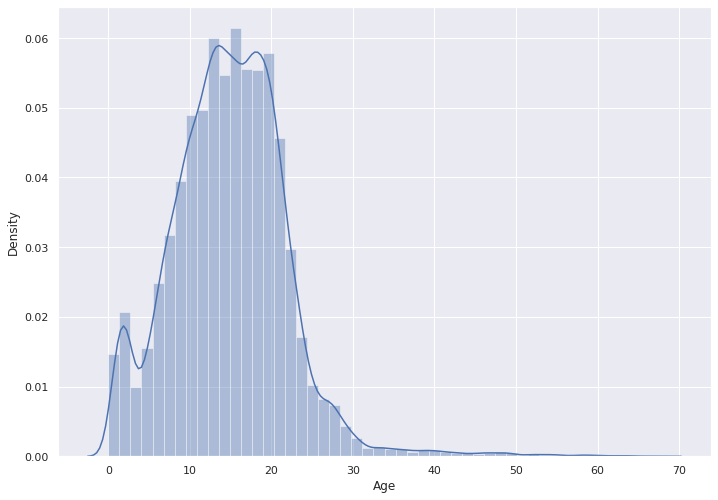

In [56]:
sns.distplot(cars['Age'])

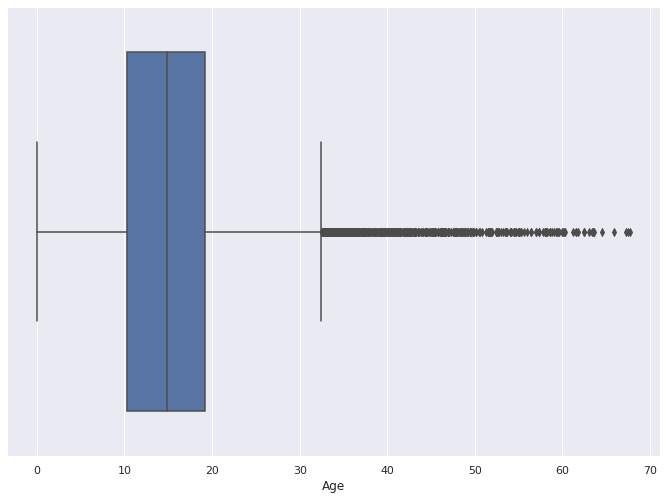

In [58]:
sns.boxplot(x=cars['Age'] )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


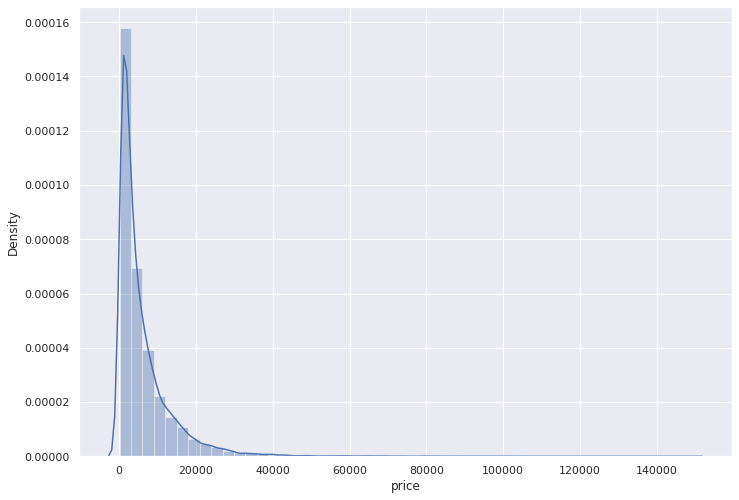

In [59]:
sns.distplot(cars['price'])

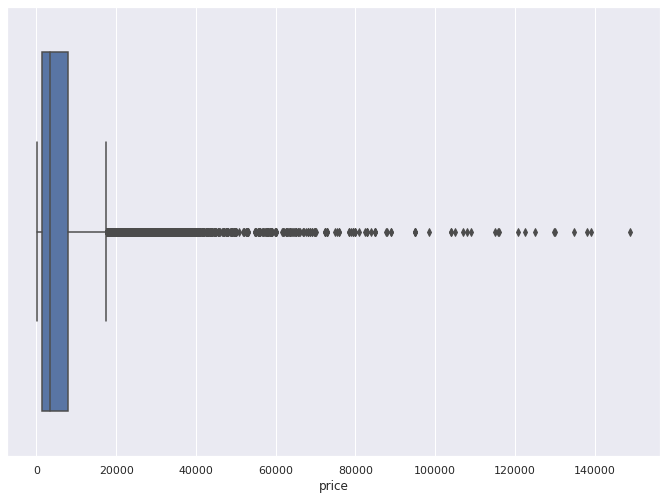

In [60]:
sns.boxplot(x=cars['price'])

In [61]:
cars.keys()

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


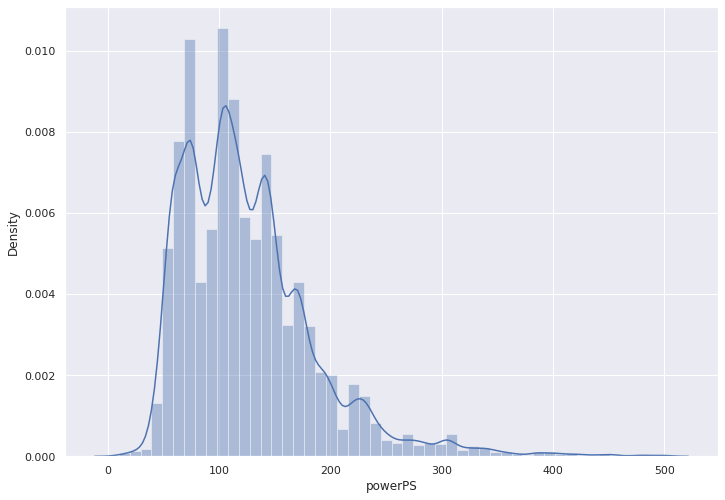

In [62]:
sns.distplot(cars['powerPS'])

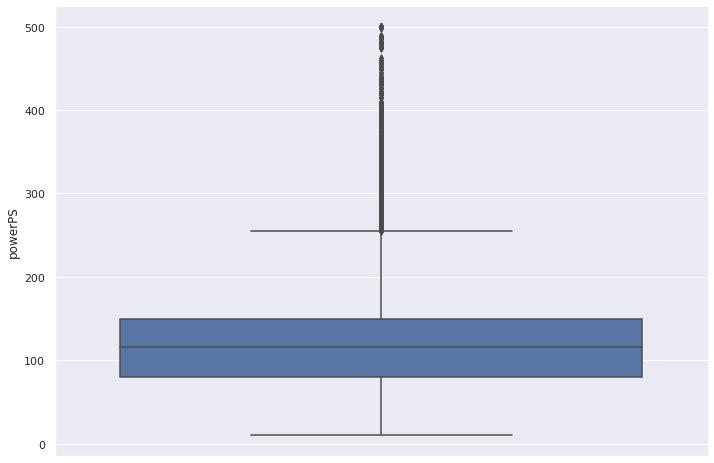

In [63]:
sns.boxplot(y=cars['powerPS'])

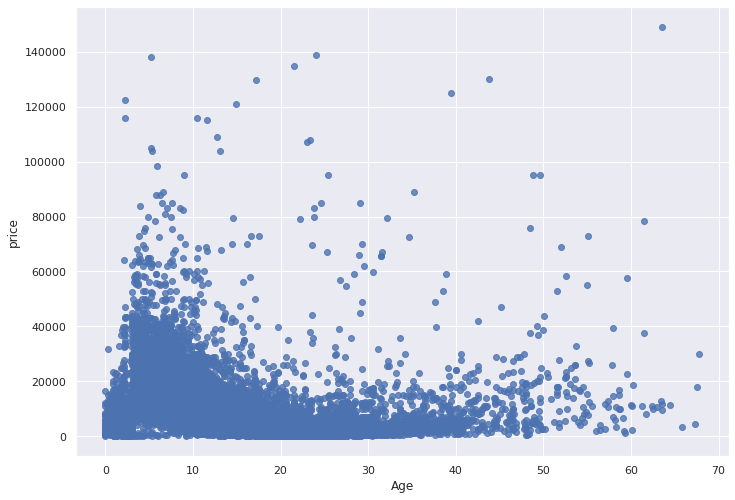

In [64]:
sns.regplot(x= 'Age', y= 'price',scatter= True, fit_reg= False, data= cars )

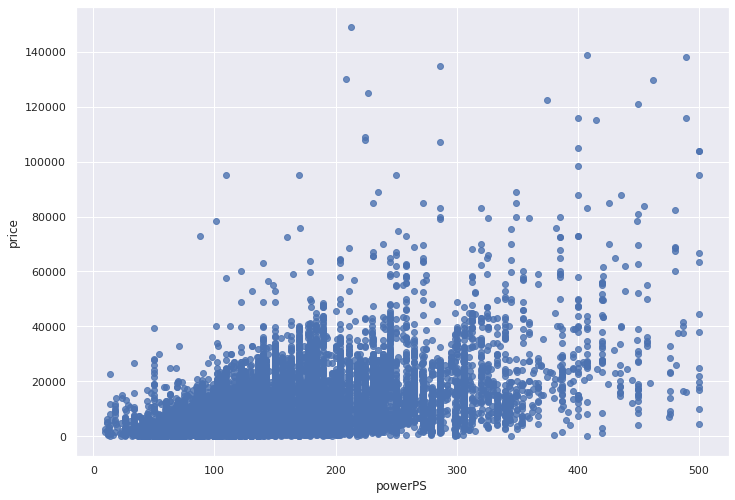

In [66]:
sns.regplot(x = 'powerPS', y = 'price', scatter = True, fit_reg = False, data= cars)

In [65]:
cars.keys()

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

In [67]:
# Variable Seller 
cars['seller'].value_counts()


private       42771
commercial        1
Name: seller, dtype: int64

In [68]:
pd.crosstab(cars['seller'],columns= 'counts', normalize = True)

col_0,counts
seller,
commercial,0.000
private,1.000


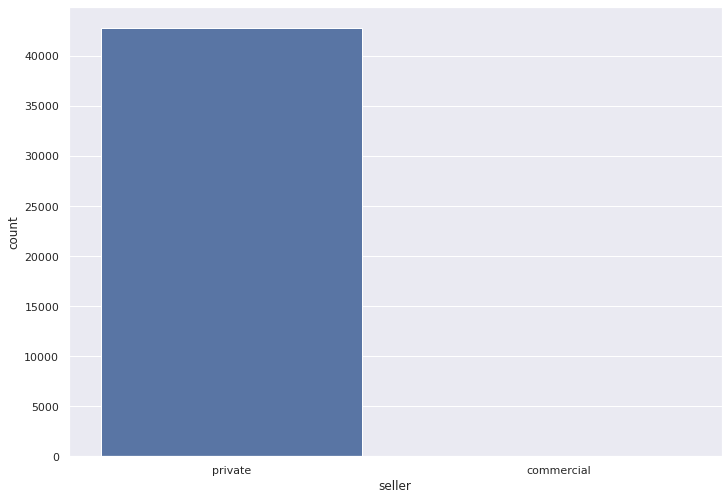

In [69]:
sns.countplot(x= 'seller', data = cars)

In [70]:
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

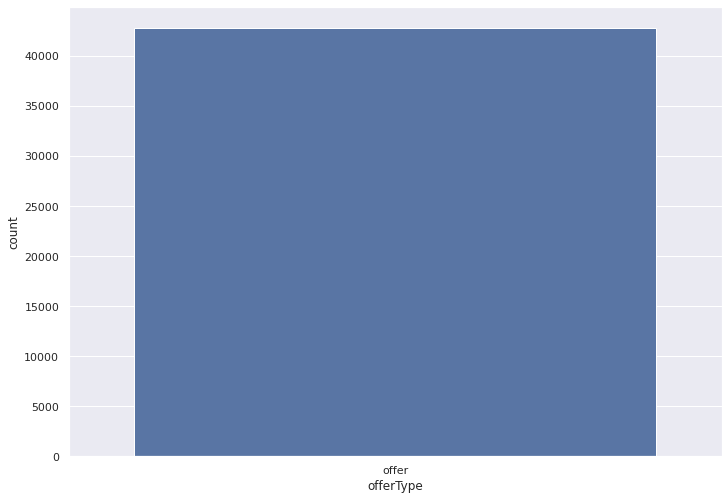

In [71]:
sns.countplot(x = 'offerType', data= cars )

In [72]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [73]:
pd.crosstab(cars['abtest'],columns= 'counts', normalize= True )

col_0,counts
abtest,
control,0.483
test,0.517


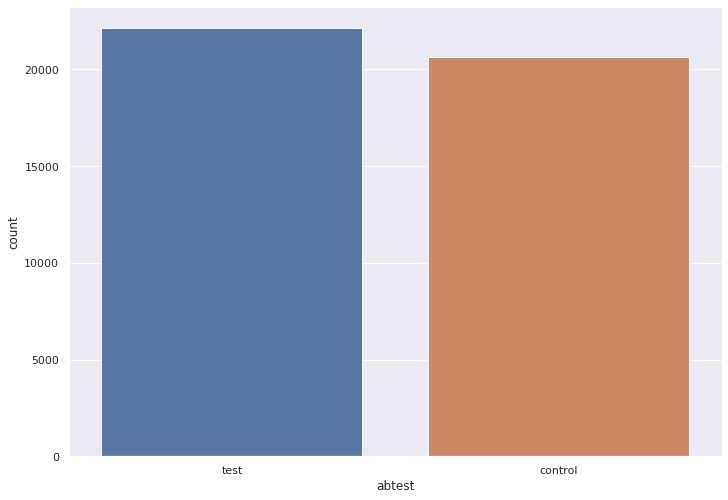

In [74]:
sns.countplot(x= 'abtest', data= cars )

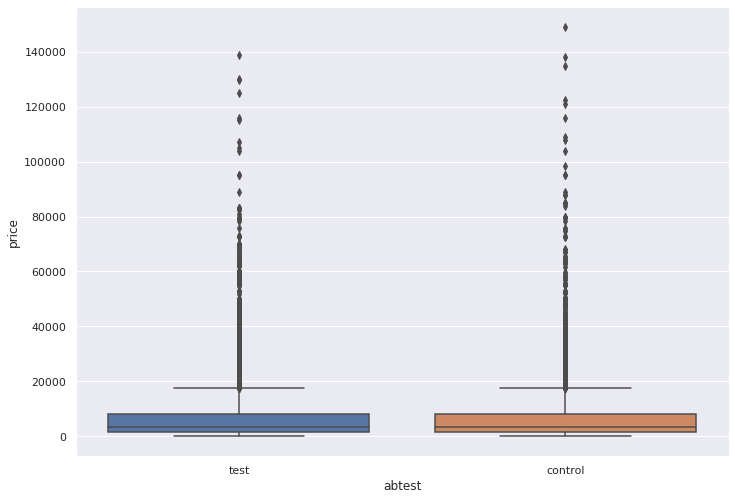

In [75]:
sns.boxplot(x= 'abtest', y = 'price', data = cars)

In [76]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [77]:
pd.crosstab(cars['vehicleType'],columns= 'counts', normalize= True )

col_0,counts
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


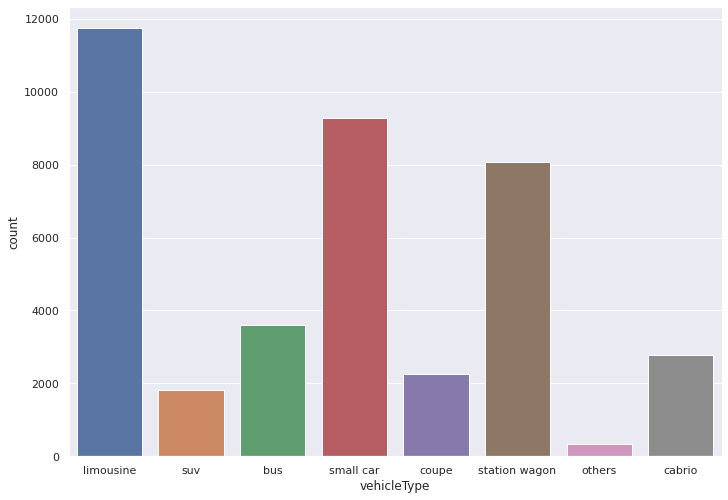

In [78]:
sns.countplot(cars['vehicleType'], data= cars)

In [79]:
cars.keys()

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

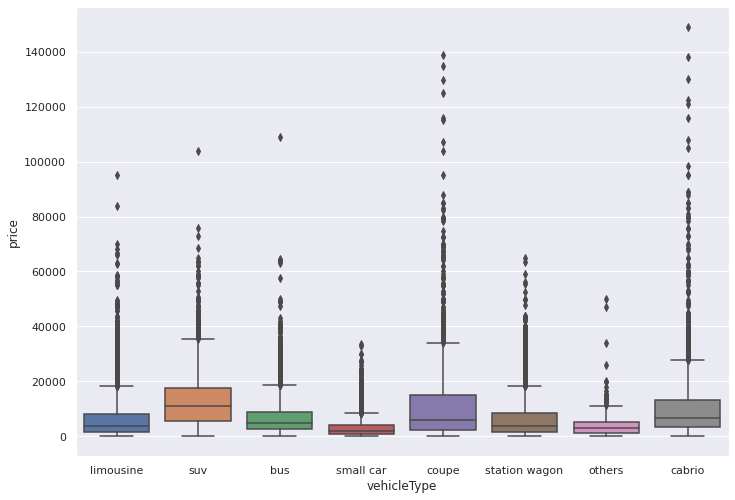

In [80]:
sns.boxplot(x= 'vehicleType', y= 'price', data= cars)

In [81]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [82]:
pd.crosstab(cars['gearbox'], columns= 'counts', normalize= True)

col_0,counts
gearbox,
automatic,0.224
manual,0.776


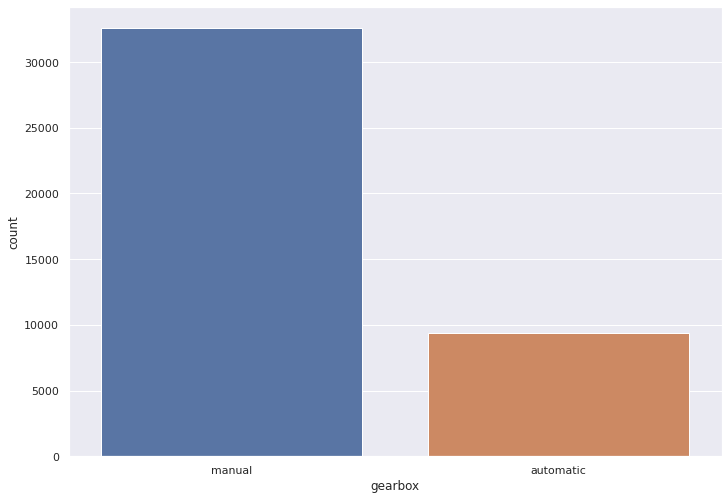

In [83]:
sns.countplot(x= 'gearbox' , data =cars)

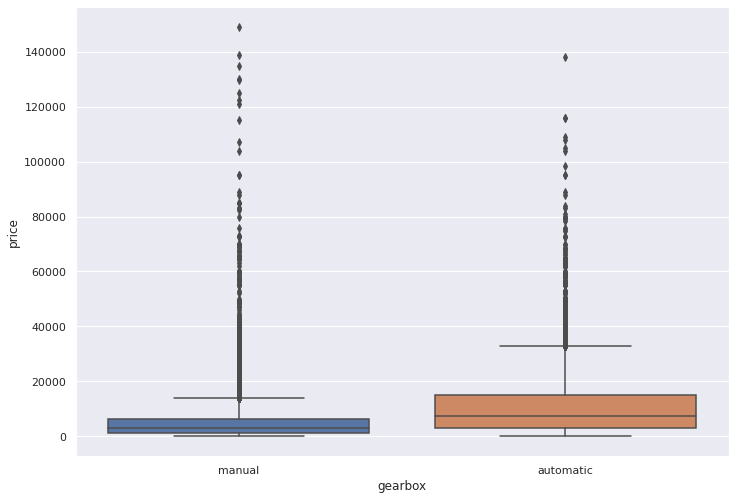

In [84]:
sns.boxplot(x= 'gearbox', y = 'price', data = cars)

In [85]:
cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
elefantino       1
charade          1
200              1
rangerover       1
Name: model, Length: 247, dtype: int64

In [86]:
pd.crosstab(cars['model'], columns= 'counts', normalize= True)

col_0,counts
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


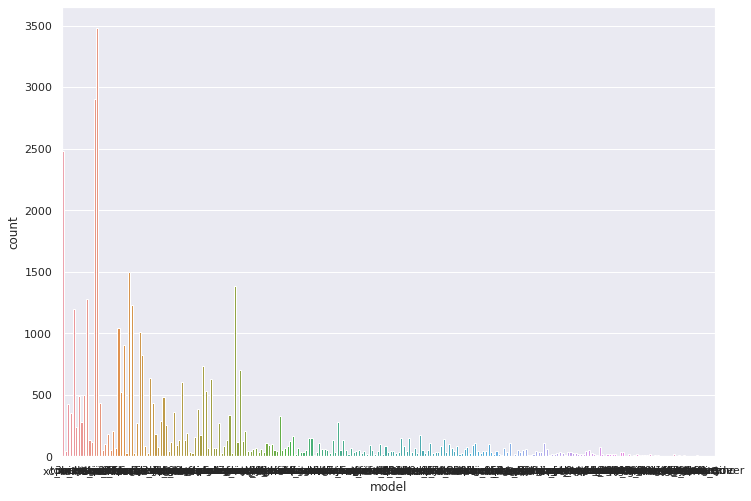

In [87]:
sns.countplot(x= 'model', data= cars)

In [88]:
cars.keys()

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

In [89]:
cars['kilometer'].value_counts()

150000    27430
125000     4597
100000     1824
90000      1484
80000      1378
70000      1182
60000      1101
50000       932
40000       795
30000       712
20000       651
5000        479
10000       207
Name: kilometer, dtype: int64

In [90]:
pd.crosstab(cars['kilometer'], columns= 'counts', normalize= True)

col_0,counts
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


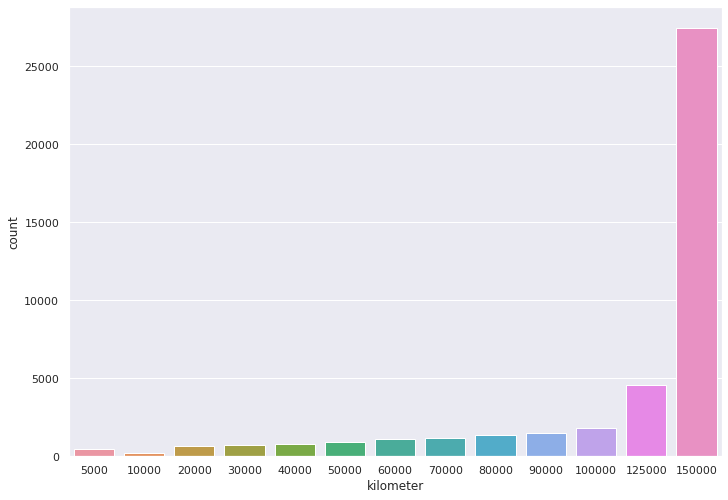

In [91]:
sns.countplot(x= 'kilometer', data= cars)

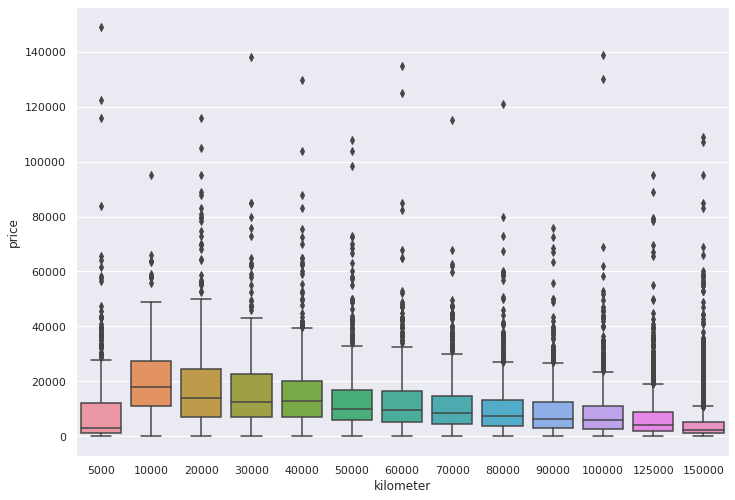

In [92]:
sns.boxplot(x= 'kilometer', y = 'price', data = cars)

#### **Work on varibale 'fuelType'**

In [93]:
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [95]:
pd.crosstab(cars['fuelType'], columns= 'counts', normalize= True)

col_0,counts
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


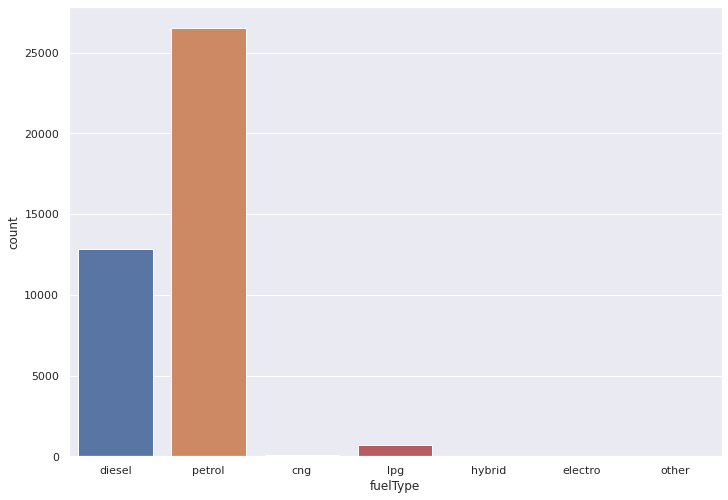

In [97]:
sns.countplot(x= 'fuelType', data= cars)

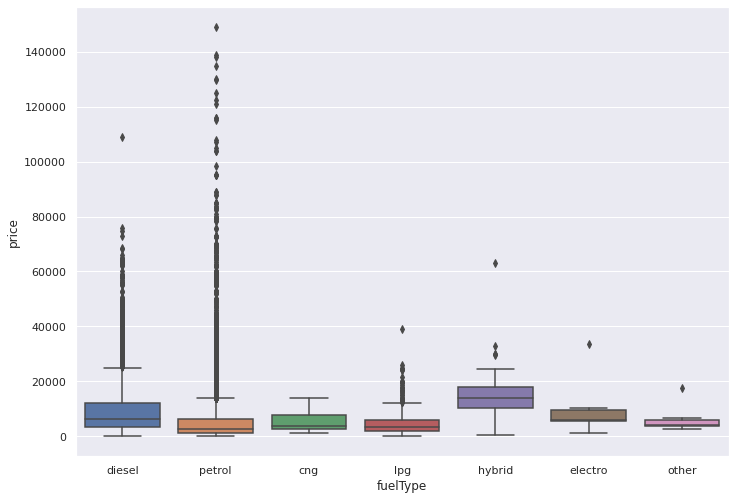

In [96]:
sns.boxplot(x= 'fuelType', y = 'price', data = cars)

#### **Work on varibale 'Brand'**

In [98]:
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
daewoo              53
rover               53
trabant             43
lada                22
Name: brand, dtype: int64

In [99]:
pd.crosstab(cars['brand'], columns= 'counts', normalize= True)

col_0,counts
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


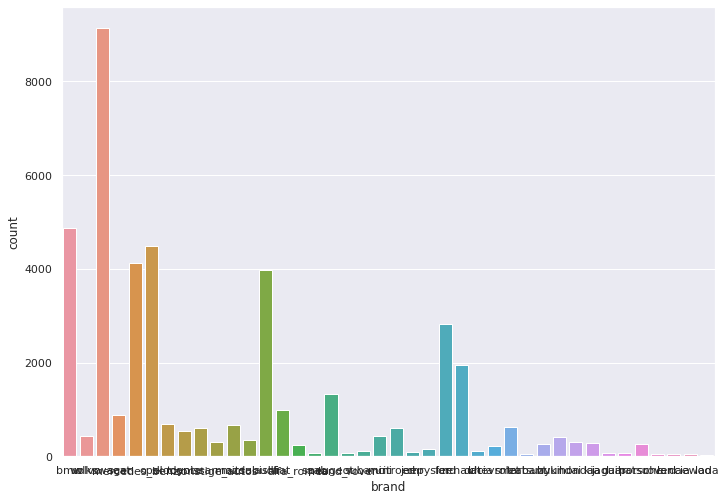

In [100]:
sns.countplot(x= 'brand', data= cars)

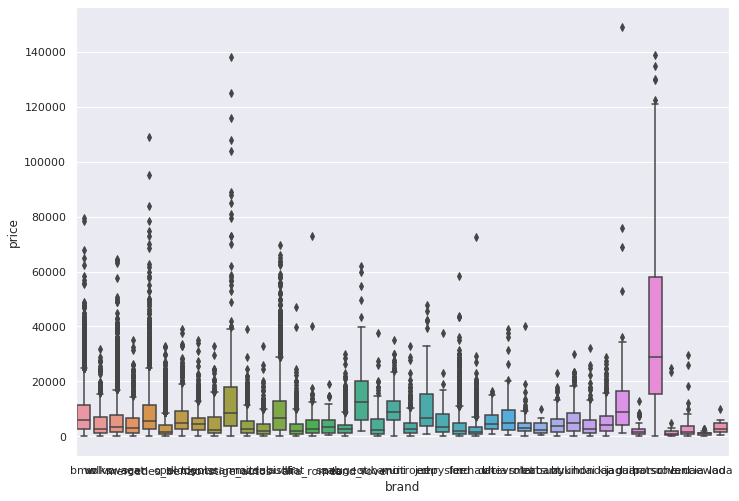

In [101]:
sns.boxplot(x= 'brand', y = 'price', data = cars)

#### **Work on varibale 'notRepairedDamage'**

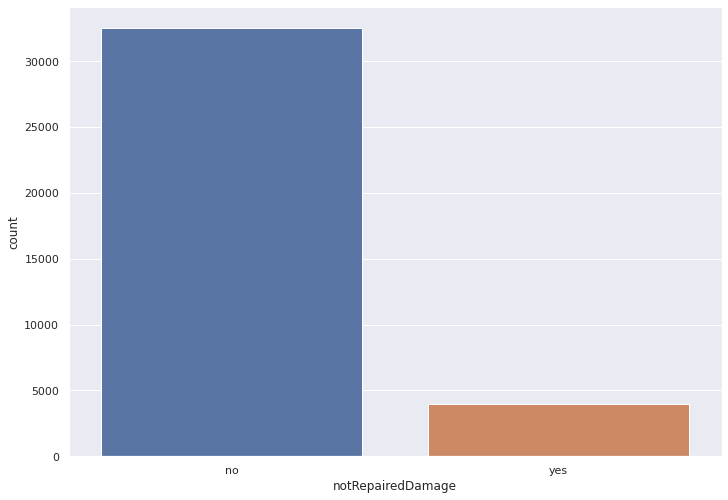

In [104]:
sns.countplot(x= 'notRepairedDamage', data= cars)

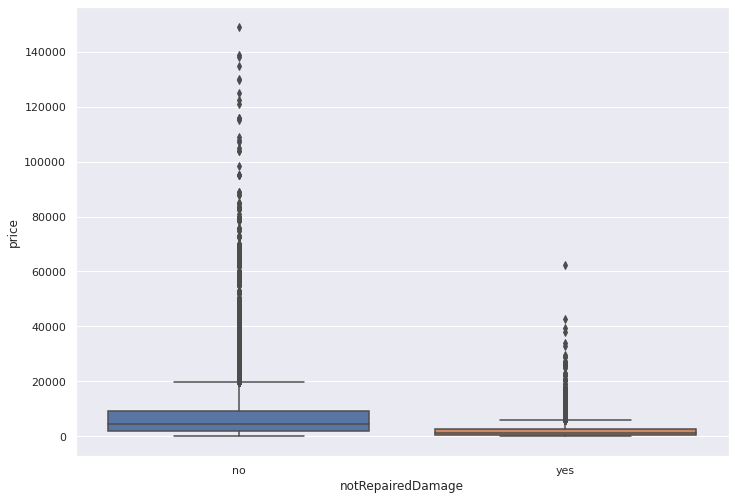

In [105]:
sns.boxplot(x= 'notRepairedDamage', y = 'price', data = cars)

In [107]:
# Removing insignificant variable
col =  ['seller','offerType','abtest']
cars = cars.drop(columns= col, axis = 1)
cars_copy = cars.copy()

In [108]:
cars_copy.keys()

Index(['price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer',
       'fuelType', 'brand', 'notRepairedDamage', 'Age'],
      dtype='object')

In [113]:
car_select1 = cars.select_dtypes(exclude=[object])
corelation = car_select1.corr()
print(corelation)

           price  powerPS  kilometer    Age
price      1.000    0.575     -0.440 -0.336
powerPS    0.575    1.000     -0.016 -0.151
kilometer -0.440   -0.016      1.000  0.292
Age       -0.336   -0.151      0.292  1.000


In [114]:
# droping missing value
cars_omit = cars.dropna(axis = 0)
cars_omit.shape

(32884, 10)

In [116]:
car_omit = pd.get_dummies(cars_omit, drop_first= True)

In [117]:
car_omit.shape

(32884, 301)

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error

In [119]:
# Seperating input feature and output feature
x1 = car_omit.drop(['price'], axis= 'columns', inplace= False)
y1 = car_omit['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbffb0f65f8>,
      dtype=object)

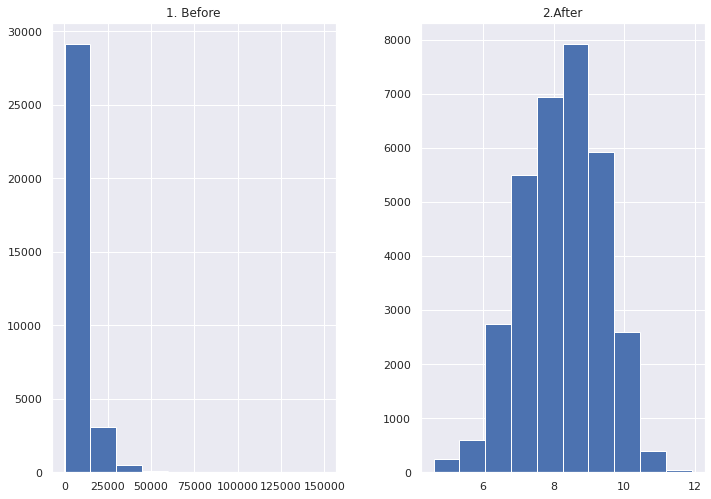

In [120]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2.After": np.log(y1)})
prices.hist()

In [121]:
# Tranforming price as a logarithmic value
y1 = np.log(y1)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size =0.30, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )


(23018, 300) (9866, 300) (23018,) (9866,)


### ** Baseline Model for omitted Data**

In [123]:
# Finding the Mean for test data value
base_pred = np.mean(y_test) 
print(base_pred)

8.249615787653337


In [124]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))
base_pred

array([8.24961579, 8.24961579, 8.24961579, ..., 8.24961579, 8.24961579,
       8.24961579])

In [125]:
base_pred.shape

(9866,)

In [126]:
y_test.shape

(9866,)

In [128]:
# Finding RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test,base_pred))
print(base_root_mean_square_error)

1.1274483657478247


In [129]:
# Linear Rgression with omitted data
lgr = LinearRegression(fit_intercept=True)
model_lin1 = lgr.fit(X_train, y_train)
# Predicting Model on test set
car_prediction_lin1 = lgr.predict(X_test)

In [130]:
# Compute mean square error and RMSE
lin_mse1 = mean_squared_error(y_test,car_prediction_lin1 )
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513843


In [131]:
# R Square Value
r2_lin1_test1 = model_lin1.score(X_test,y_test)
print(r2_lin1_test1)

0.7658615091649241


In [132]:
r2_lin1_train1 = model_lin1.score(X_train, y_train)
print(r2_lin1_train1)

0.7800936978183916


In [133]:
# Regression diagonostics
residual1 = y_test - car_prediction_lin1

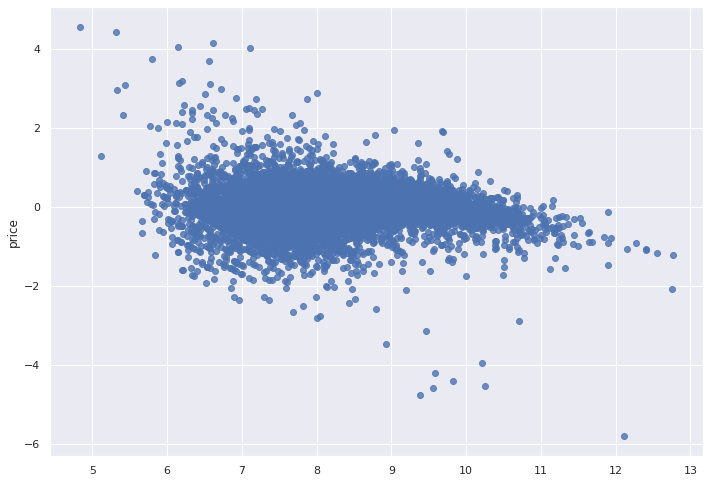

In [134]:
sns.regplot(x = car_prediction_lin1, y =residual1, scatter= True, fit_reg= False, data= cars)

In [135]:
residual1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

In [137]:
#rf = RandomForestRegressor(n_estimators=100,max_features= 'auto',max_depth= 100,min_samples_split=10,min_samples_leaf=4,random_state=1)
rf = RandomForestRegressor(n_estimators=100,max_features= 'auto',max_depth=100, min_samples_split=10,min_samples_leaf=4,random_state=1)

In [138]:
model_rf1 = rf.fit(X_train, y_train)

In [139]:
car_prediction_rf1 = rf.predict(X_test)

In [140]:
rf_mse1 = mean_squared_error(y_test, car_prediction_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [141]:
r2_rf_test1 = model_rf1.score(X_test, y_test)
r2_rf_train1 = model_rf1.score(X_train, y_train)
print(r2_rf_test1,r2_rf_train1)

0.8504018147750623 0.9202494705146291


In [142]:
# Model Building with input data
cars_input = cars.apply(lambda x :x.fillna(x.median()) \
                        if x.dtype == 'float' else \
                        x.fillna(x.value_counts().index[0]))
cars_input.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [143]:
# Convert categorical column in to dummy variable 
cars_input = pd.get_dummies(cars_input, drop_first= True)
cars_input.head()

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_elefantino,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
0,4450,150,150000,15.250,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [144]:
cars_input.keys()

Index(['price', 'powerPS', 'kilometer', 'Age', 'vehicleType_cabrio',
       'vehicleType_coupe', 'vehicleType_limousine', 'vehicleType_others',
       'vehicleType_small car', 'vehicleType_station wagon',
       ...
       'brand_skoda', 'brand_smart', 'brand_sonstige_autos', 'brand_subaru',
       'brand_suzuki', 'brand_toyota', 'brand_trabant', 'brand_volkswagen',
       'brand_volvo', 'notRepairedDamage_yes'],
      dtype='object', length=304)

In [145]:
cars_input.shape

(42772, 304)

In [146]:
x2 = cars_input.drop(['price'], axis= 'columns', inplace= False)
y2 = cars_input['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbffae99908>,
      dtype=object)

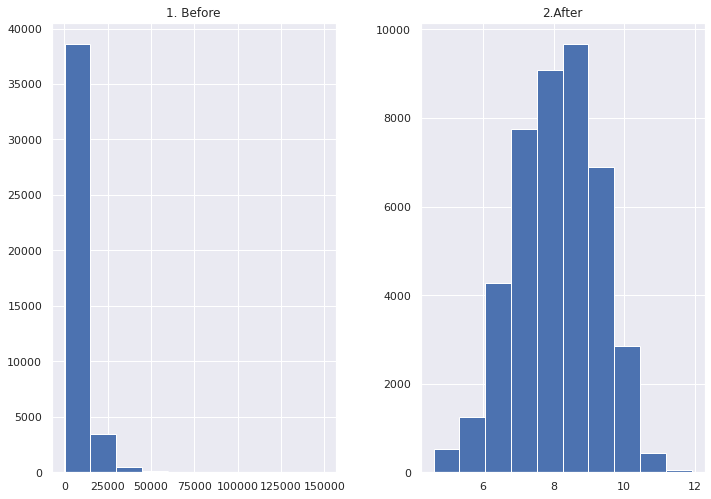

In [147]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2.After": np.log(y2)})
prices.hist()

In [ ]:
y2 = np.log(y2)

In [148]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size =0.30, random_state=3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape )

(29940, 303) (12832, 303) (29940,) (12832,)


In [150]:
y_test1.shape

(12832,)

In [151]:
# Baseline for inputed data
# finding mean of data value 
base_pred1 = np.mean(y_test1)
print(base_pred1)

6063.874454488778


In [152]:
base_pred1 = np.repeat(base_pred1, len(y_test1))

In [153]:
base_pred1.shape

(12832,)

In [154]:
# Finding the RMSE
base_root_mean_square_error1 = np.sqrt(mean_squared_error(y_test1,base_pred1))
print(base_root_mean_square_error1)

8044.361068294785


In [155]:
# Linear Rgression with omitted data
lgr1 = LinearRegression(fit_intercept=True)
model_lin2 = lgr1.fit(X_train1, y_train1)
# # Predicting Model on test set
car_prediction_lin2 = lgr1.predict(X_test1)

In [156]:
# Compute mean square error and RMSE
lin_mse2 = mean_squared_error(y_test1,car_prediction_lin2 )
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

4870.910705590804


In [ ]:
# R Square Value
r2_lin1_test = model_lin1.score(X_test,y_test)
print(r2_lin1_test)

In [157]:
r2_lin1_train1 = model_lin1.score(X_train, y_train)
print(r2_lin1_train1)

0.7800936978183916
